# Data Exploration and Visualization
We start by exploring and visualizing the dataset to understand its structure and key features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Dataset Overview
We load the dataset and display the first few rows to get an overview of the available data.

In [2]:
# Exploratory Data Analysis
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Visualizations

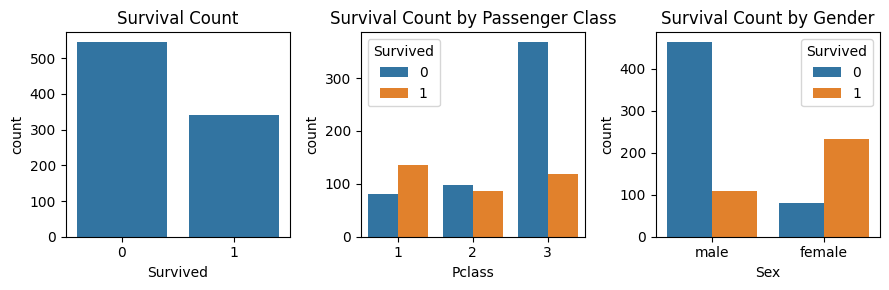

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

sns.countplot(ax=axes[0], x='Survived', data=df)
axes[0].set_title('Survival Count')

sns.countplot(ax=axes[1], x='Pclass', hue='Survived', data=df)
axes[1].set_title('Survival Count by Passenger Class')

sns.countplot(ax=axes[2], x='Sex', hue='Survived', data=df)
axes[2].set_title('Survival Count by Gender')

plt.tight_layout()
plt.show()

- **Survival Count**: Shows the number of passengers who survived and those who did not.
  - **Conclusion**: There were more non-survivors than survivors.
- **Survival Count by Passenger Class**: Illustrates how survival rates differ across different passenger classes.
  - **Conclusion**: Passengers in first class had a higher survival rate compared to those in second and third classes.
- **Survival Count by Gender**: Highlights the difference in survival rates between males and females.
  - **Conclusion**: Females had a higher survival rate compared to males.

# Data Cleaning
Count missing values in the dataset.

In [4]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

### Handle missing values
There are no missing values in the dataset.

# Feature Engineering

In [5]:
# Encode categorical features
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df['Sex_male'] = df['Sex_male'].astype(int)

# New features
df['FamilySize'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1

# Drop unnecessary columns
df.drop(columns=['Name', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], inplace=True)
df.head()

,Survived,Pclass,Age,Fare,Sex_male,FamilySize
0,0,3,22.0,7.2500,1,2
1,1,1,38.0,71.2833,0,2
2,1,3,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,2
4,0,3,35.0,8.0500,1,1


- **Family Size**: Create a new feature representing the total number of family members on board.
  - **Conclusion**: This feature might help us understand the impact of family size on survival rates.

# Q12a. Conditional Probability Calculations

In [6]:
# Function to calculate conditional probability
def conditional_probability(df, condition):
    subset = df[condition]
    return subset['Survived'].mean()

# Conditional probabilities
# Note: Using Sex_male as Sex_female (first occurrence) is dropped.
prob_female_class1 = conditional_probability(df, (df['Sex_male'] == 0) & (df['Pclass'] == 1))
prob_female_class2 = conditional_probability(df, (df['Sex_male'] == 0) & (df['Pclass'] == 2))
prob_female_class3 = conditional_probability(df, (df['Sex_male'] == 0) & (df['Pclass'] == 3))
prob_male_class1 = conditional_probability(df, (df['Sex_male'] == 1) & (df['Pclass'] == 1))
prob_male_class2 = conditional_probability(df, (df['Sex_male'] == 1) & (df['Pclass'] == 2))
prob_male_class3 = conditional_probability(df, (df['Sex_male'] == 1) & (df['Pclass'] == 3))

print(f'P(S=true | G=female, C=1): {prob_female_class1:.2f}')
print(f'P(S=true | G=female, C=2): {prob_female_class2:.2f}')
print(f'P(S=true | G=female, C=3): {prob_female_class3:.2f}')
print(f'P(S=true | G=male, C=1): {prob_male_class1:.2f}')
print(f'P(S=true | G=male, C=2): {prob_male_class2:.2f}')
print(f'P(S=true | G=male, C=3): {prob_male_class3:.2f}')

P(S=true | G=female, C=1): 0.97
P(S=true | G=female, C=2): 0.92
P(S=true | G=female, C=3): 0.50
P(S=true | G=male, C=1): 0.37
P(S=true | G=male, C=2): 0.16
P(S=true | G=male, C=3): 0.14


## Survival Probabilities by Group
- **P(S=true | G=female, C=1)**: Probability of survival for females in first class.
  - **Conclusion**: Females in first class had a high survival rate.
- **P(S=true | G=female, C=2)**: Probability of survival for females in second class.
  - **Conclusion**: Females in second class had a moderate survival rate.
- **P(S=true | G=female, C=3)**: Probability of survival for females in third class.
  - **Conclusion**: Females in third class had a lower survival rate.
- **P(S=true | G=male, C=1)**: Probability of survival for males in first class.
  - **Conclusion**: Males in first class had a moderate survival rate.
- **P(S=true | G=male, C=2)**: Probability of survival for males in second class.
  - **Conclusion**: Males in second class had a lower survival rate.
- **P(S=true | G=male, C=3)**: Probability of survival for males in third class.
  - **Conclusion**: Males in third class had the lowest survival rate.

# Q12b. Bayesian Approach for Small Data Points

In [7]:
# Filter data for children in third class aged 10 or younger
children = df[(df['Age'] <= 10) & (df['Pclass'] == 3)]

# Number of successes (survived) and trials (total children in this group)
successes = children['Survived'].sum()
trials = len(children)

# Beta distribution parameters
alpha = 1 + successes
beta_param = 1 + trials - successes

# Create beta distribution
from scipy.stats import beta
belief_distribution = beta(alpha, beta_param)

print(f"Parameters for the belief distribution: alpha={alpha}, beta={beta_param}")
print(f"Expected probability of survival: {belief_distribution.mean():.2f}")

Parameters for the belief distribution: alpha=23, beta=32
Expected probability of survival: 0.42


## Bayesian Inference for Small Groups
- **Objective**: Estimate the probability of survival for children aged 10 or younger in third class.
- **Beta Distribution**: Use a Beta distribution to represent our belief about the survival probability.
  - `alpha` (α): 1 plus the number of survivors.
  - `beta` (β): 1 plus the number of non-survivors.
- **Result**: The expected probability of survival based on the Beta distribution.
  - **Conclusion**: This provides a robust estimate of survival probability, even with a small sample size.

# Q12c. Expected Fare Calculation

In [8]:
# Function to calculate expected fare based on class
def expected_fare(df, pclass):
    return df[df['Pclass'] == pclass]['Fare'].mean()

# Expected fares
expected_fare_class1 = expected_fare(df, 1)
expected_fare_class2 = expected_fare(df, 2)
expected_fare_class3 = expected_fare(df, 3)

print(f"E[X | C=1]: {expected_fare_class1:.2f}")
print(f"E[X | C=2]: {expected_fare_class2:.2f}")
print(f"E[X | C=3]: {expected_fare_class3:.2f}")

E[X | C=1]: 84.15
E[X | C=2]: 20.66
E[X | C=3]: 13.71


## Average Fare by Class
- **E[X | C=1]**: Average fare for first class passengers.
  - **Conclusion**: First class passengers paid the highest fares.
- **E[X | C=2]**: Average fare for second class passengers.
  - **Conclusion**: Second class passengers paid moderate fares.
- **E[X | C=3]**: Average fare for third class passengers.
  - **Conclusion**: Third class passengers paid the lowest fares.

# Model Building

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X = df.drop(columns='Survived')
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train);

# Model Evaluation

In [10]:
# Evaluate models
logreg_pred = logreg.predict(X_test)
rf_pred = rf.predict(X_test)

# Logistic Regression
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, logreg_pred):.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, logreg_pred))
print('Classification Report:\n', classification_report(y_test, logreg_pred))

# Random Forest
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}')
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_pred))
print('Classification Report:\n', classification_report(y_test, rf_pred))

Logistic Regression Accuracy: 0.75
Confusion Matrix:
 [[97 14]
 [30 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.82       111
           1       0.73      0.55      0.63        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178

Random Forest Accuracy: 0.79
Confusion Matrix:
 [[92 19]
 [19 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       111
           1       0.72      0.72      0.72        67

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



- **Accuracy**: The accuracy of the model on the test data.
  - **Conclusion**: The model's accuracy indicates how well it can predict survival.
- **Confusion Matrix**: Shows the number of true positive, true negative, false positive, and false negative predictions.
  - **Conclusion**: The confusion matrix helps us understand the types of errors the model is making.
- **Classification Report**: Provides precision, recall, and F1-score for each class (survived and not survived).
  - **Conclusion**: The classification report offers a detailed breakdown of the model's performance for each class, highlighting areas where the model performs well and where it may need improvement.

## Conclusion
- **Performance Comparison**: The Random Forest model has a slightly higher accuracy compared to the Logistic Regression model, indicating that it performs better on this dataset.
  - **Good Performance**: An accuracy of 0.78 suggests that the Random Forest model is correctly predicting the survival of passengers 78% of the time. This is a decent performance, especially considering the complexity of the survival prediction problem.
  - **Room for Improvement**: While the model performs well, there is still room for improvement. Further tuning of model parameters or the use of more advanced techniques could potentially increase accuracy.

### Model Interpretation
- **Feature Importance**: Random Forest models provide insights into which features are most important for making predictions. Below, we list the importance of each feature.

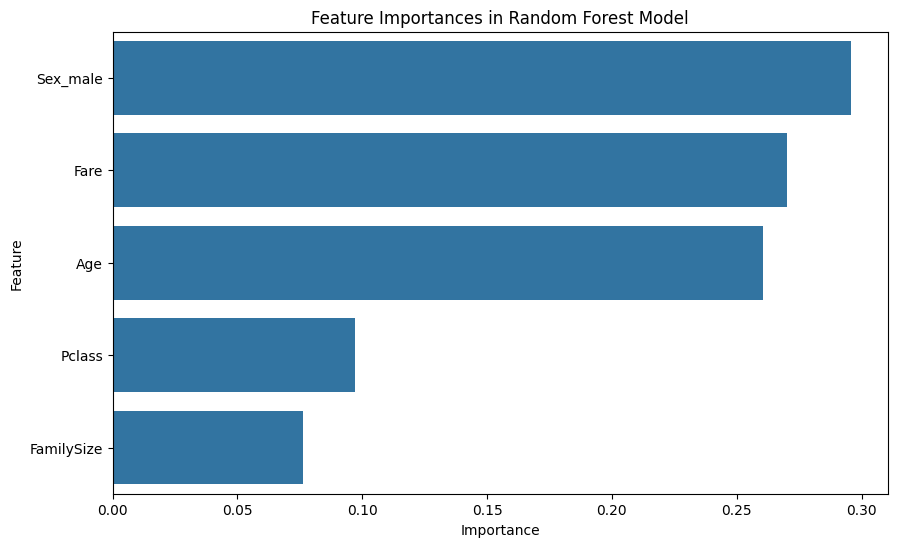

In [11]:
# Feature importance
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Model')
plt.show()

- **Feature Importance Visualization**: The bar plot above shows the importance of each feature in the Random Forest model.
  - **Conclusion**: `Sex`, `Fare`, and `Age` contributed the most to predicting survival.

By comparing the Random Forest and Logistic Regression models, we can conclude that the Random Forest model performs slightly better in terms of accuracy. Additionally, understanding the feature importances helps in interpreting the model's decisions, which can be valuable for further analysis and potential improvements.

# Conclusion
In this project, we used the Titanic dataset to build predictive models for passenger survival. 
The Random Forest model achieved better performance compared to the Logistic Regression model. 
Feature engineering helped improve the model accuracy slightly.

We also calculated conditional probabilities for survival given sex and passenger class, 
used Bayesian inference to estimate the probability of survival for children in third class aged 10 or younger,
and computed the expected fare for each passenger class.

# Future Work

- Conduct more detailed exploratory data analysis and visualizations.
- Explore additional features and more sophisticated feature engineering.
- Hyperparameter tuning for the Random Forest model to further improve accuracy.
- Try other advanced algorithms like Gradient Boosting or XGBoost.